## Import Libraries


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix , ConfusionMatrixDisplay
import joblib

## Read Data

In [5]:
df = pd.read_csv("C:\\Users\\rtaha\\2023-BS-AI-090\\Classification\\Obesity Classification.csv")
df

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [7]:
df.describe(include='all')

,ID,Age,Gender,Height,Weight,BMI,Label
count,108.000000,108.000000,108,108.000000,108.000000,108.000000,108
unique,NaN,NaN,2,NaN,NaN,NaN,4
top,NaN,NaN,Male,NaN,NaN,NaN,Underweight
freq,NaN,NaN,56,NaN,NaN,NaN,47
mean,56.046296,46.555556,NaN,166.574074,59.490741,20.549074,NaN
std,31.917939,24.720620,NaN,27.873615,28.856233,7.583818,NaN
min,1.000000,11.000000,NaN,120.000000,10.000000,3.900000,NaN
25%,28.750000,27.000000,NaN,140.000000,35.000000,16.700000,NaN
50%,56.500000,42.500000,NaN,175.000000,55.000000,21.200000,NaN
75%,83.250000,59.250000,NaN,190.000000,85.000000,26.100000,NaN


In [8]:
df.duplicated().sum()

0

## Data Visulization

In [9]:
count_gen=df['Gender'].value_counts()
count_gen

Male      56
Female    52
Name: Gender, dtype: int64

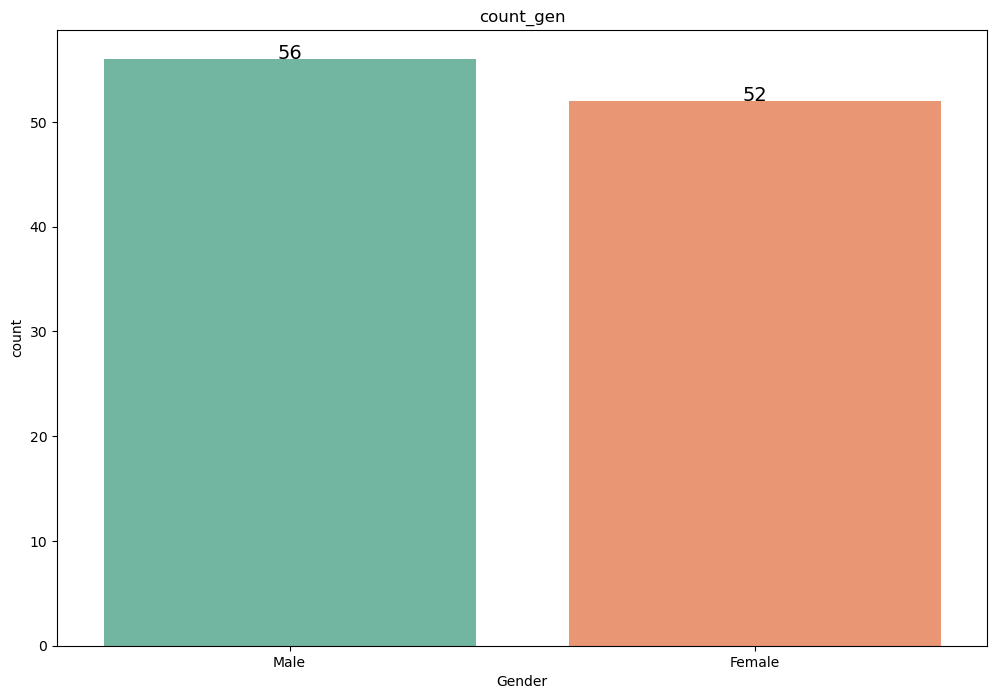

In [10]:
plt.figure(figsize=(12,8))
ax=sns.barplot(x=count_gen.index,y=count_gen.values,palette='Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha = 'center', fontsize=14, color='black', xytext=(0, 0), textcoords='offset points')
plt.title('count_gen')
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()

In [11]:
count_label=df['Label'].value_counts()
count_label

Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: Label, dtype: int64

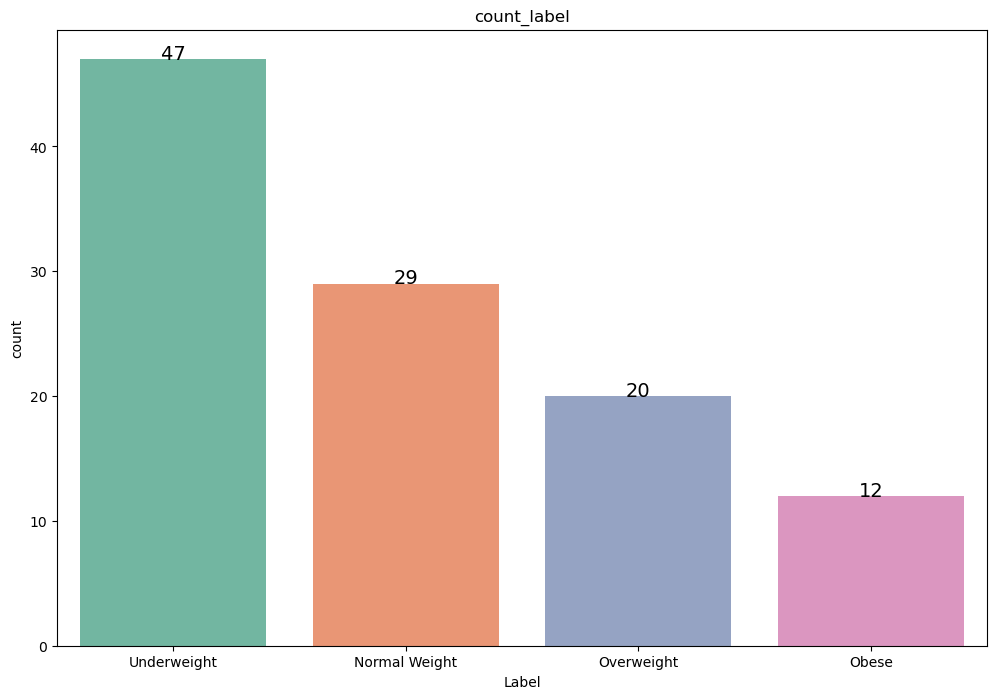

In [12]:
plt.figure(figsize=(12,8))
ax=sns.barplot(x=count_label.index,y=count_label.values,palette='Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha = 'center', fontsize=14, color='black', xytext=(0, 0), textcoords='offset points')
plt.title('count_label')
plt.xlabel('Label')
plt.ylabel('count')
plt.show()

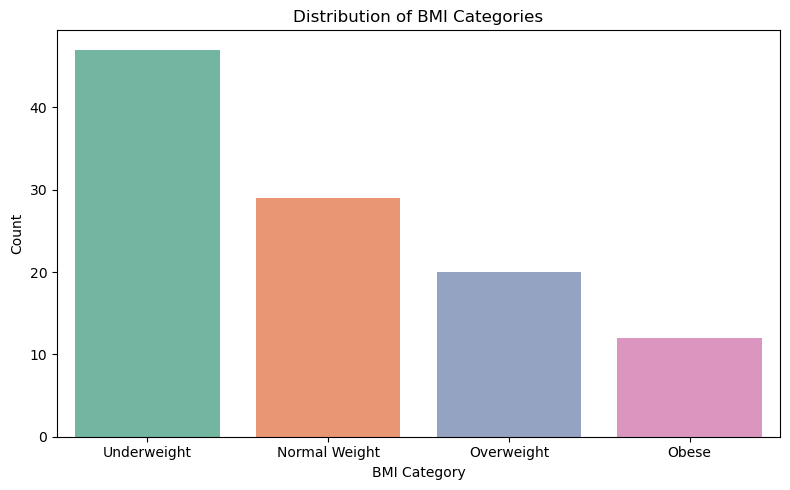

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Label', order=df['Label'].value_counts().index, palette='Set2')
plt.title('Distribution of BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

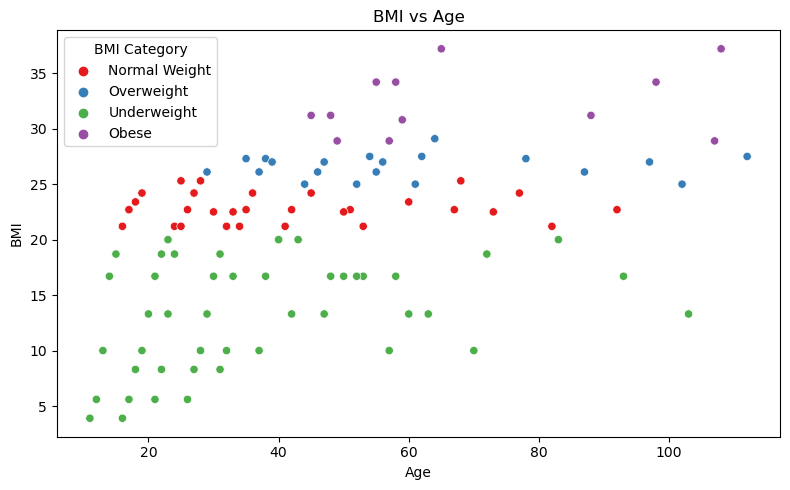

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='BMI', hue='Label', palette='Set1')
plt.title('BMI vs Age')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='BMI Category')
plt.tight_layout()
plt.show()

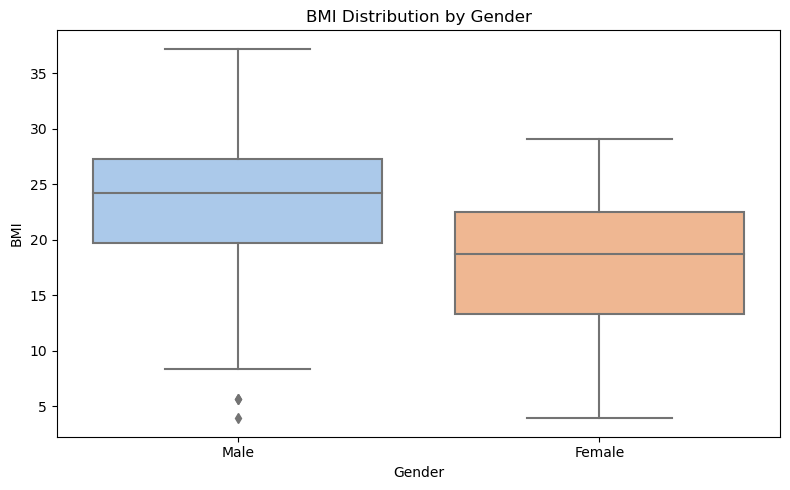

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Gender', y='BMI', palette='pastel')
plt.title('BMI Distribution by Gender')
plt.tight_layout()
plt.show()

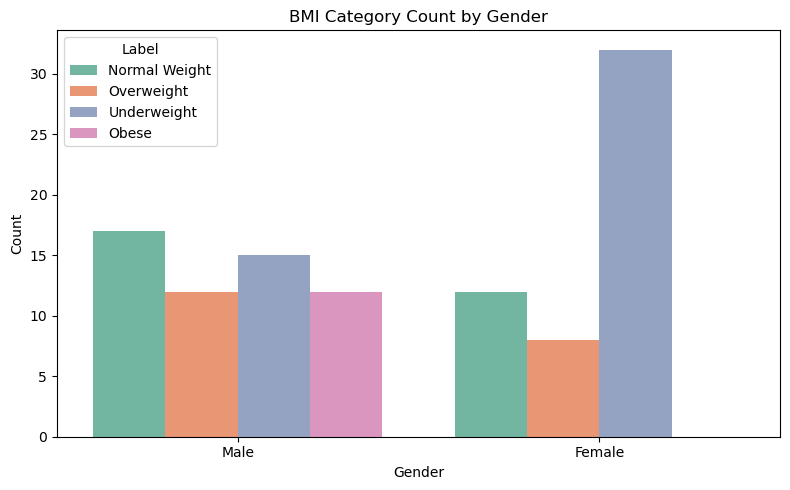

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', hue='Label', palette='Set2')
plt.title('BMI Category Count by Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Preprocessing

## Encoder

In [17]:
lb=LabelEncoder()
df['Gender']=lb.fit_transform(df['Gender'])
df['Label']=lb.fit_transform(df['Label'])

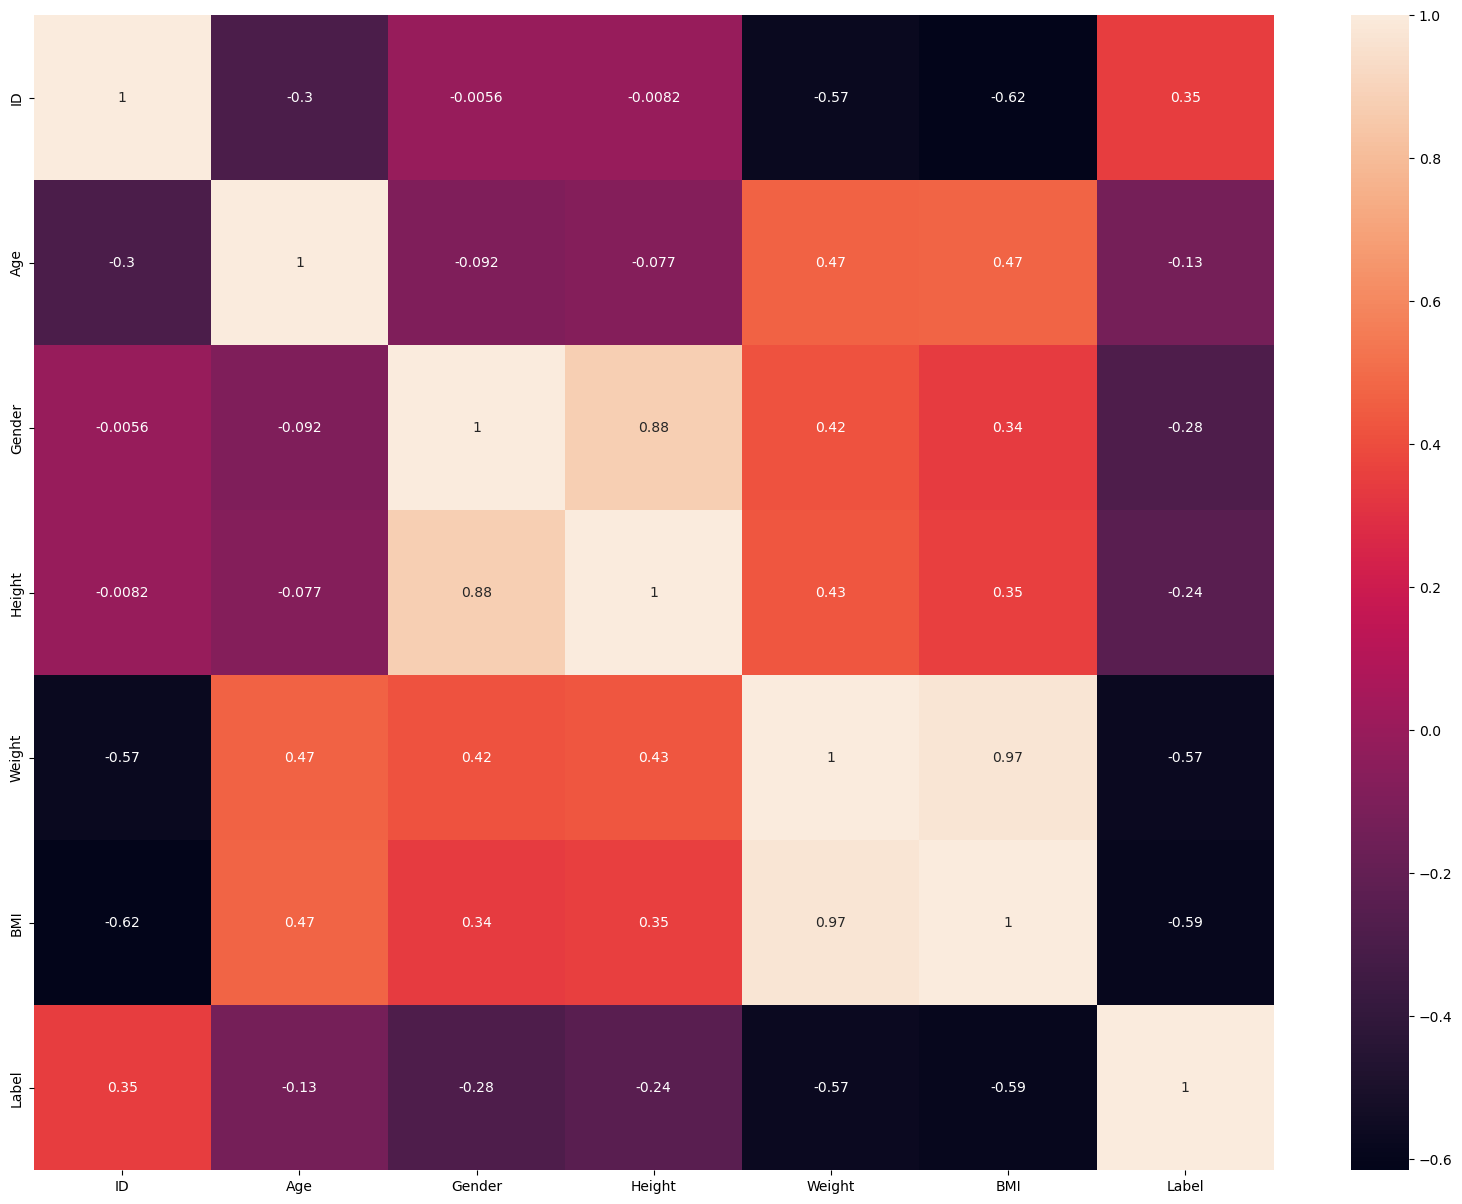

In [18]:
plt.figure(figsize=(20 ,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

## check outliers

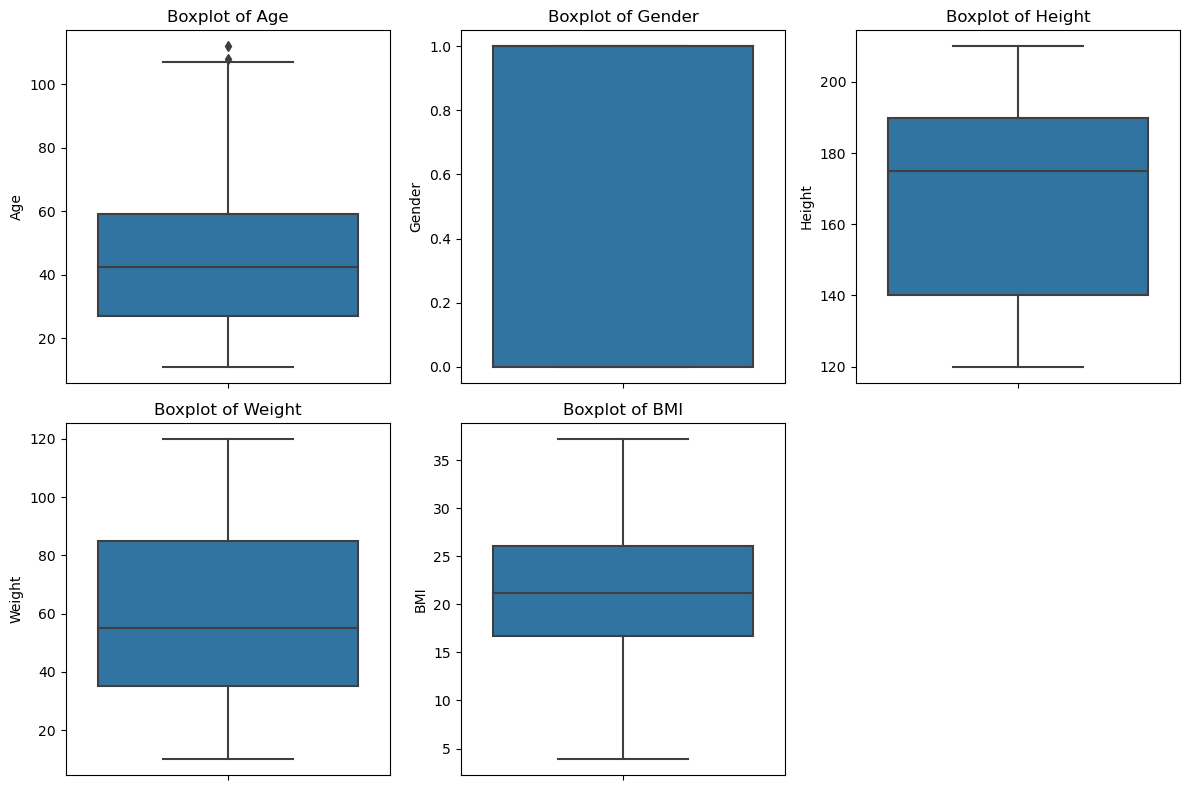

In [19]:
numeric_cols = ['Age','Gender', 'Height', 'Weight', 'BMI']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [20]:
def count_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers

for col in numeric_cols:
    outliers = count_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")

Age: 2 outliers
Gender: 0 outliers
Height: 0 outliers
Weight: 0 outliers
BMI: 0 outliers


## Remove outliers

In [21]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

numeric_cols = ['Age', 'Height', 'Weight', 'BMI']

# Remove outliers
df_edit = remove_outliers_iqr(df, numeric_cols)

In [22]:
print("Before:", df.shape)
print("After:", df_edit.shape)

Before: (108, 7)
After: (106, 7)


In [23]:
data=df_edit.drop(columns=['ID'])
data

,Age,Gender,Height,Weight,BMI,Label
0,25,1,175,80,25.3,0
1,30,0,160,60,22.5,0
2,35,1,180,90,27.3,2
3,40,0,150,50,20.0,3
4,45,1,190,100,31.2,1
...,...,...,...,...,...,...
103,11,1,175,10,3.9,3
104,16,0,160,10,3.9,3
105,21,1,180,15,5.6,3
106,26,0,150,15,5.6,3


## Define features and Target

In [24]:
x=data.drop(columns=['Label'])
y=data['Label']

In [25]:
y=y.values.reshape(-1,1)

In [26]:
print("features :",x.shape)
print("target :",y.shape)

features : (106, 5)
target : (106, 1)


## scaling

In [27]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

## Split Data

In [28]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42,stratify=y)

## Build Model

In [29]:
Rf =RandomForestClassifier()
Rf.fit(X_train,y_train)

c:\Users\rtaha\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [30]:
Rf.score(X_train,y_train)

1.0

In [31]:
y_pred=Rf.predict(X_test)

In [32]:
print(accuracy_score(y_test,y_pred))

0.9629629629629629


[[ 7  0  0  0]
 [ 0  3  0  0]
 [ 1  0  4  0]
 [ 0  0  0 12]]


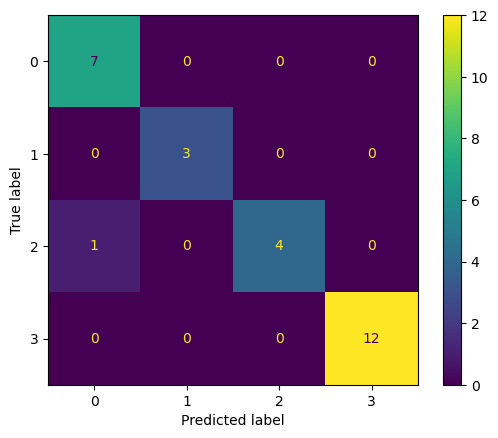

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00        12

    accuracy                           0.96        27
   macro avg       0.97      0.95      0.96        27
weighted avg       0.97      0.96      0.96        27



In [35]:
joblib.dump(Rf, 'obesity_model.pkl')

['obesity_model.pkl']